In [1]:
%matplotlib inline
# %matplotlib qt

Gradient decay
==========================================

Some results worth saving and displaying for visualization and understanding

1/ Decay of gradient variances with increasing qubit count
---------------------------

First importing the relevant packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from gadget_plots import *

data_folder = '../../results/data/'

colours = np.array([plt.cm.Purples(np.linspace(0, 1, 10)), 
                    plt.cm.Blues(np.linspace(0, 1, 10)),
                    plt.cm.Oranges(np.linspace(0, 1, 10)),
                    plt.cm.Reds(np.linspace(0, 1, 10)),
                    plt.cm.Greys(np.linspace(0, 1, 10))])[:, 3:]

Exponential decay of the global Hamiltonian
$$H_G = \bigotimes_{i=1}^n \sigma_i^z $$

Trainability of the local Hamiltonian
$$H_L = Z_1^{(c)} Z_2^{(c)}$$

Equivalent plot for the gadget decomposition of the global Hamiltonian
$$H^{gad} = H^{anc} + \lambda V 
    = (\mathbb{I} - Z_1^{(a)} Z_2^{(a)}) + (\mathbb{I} - Z_1^{(a)} Z_3^{(a)}) + (\mathbb{I} - Z_1^{(a)} Z_4^{(a)})
    + (\mathbb{I} - Z_2^{(a)} Z_3^{(a)}) + (\mathbb{I} - Z_2^{(a)} Z_4^{(a)}) + (\mathbb{I} - Z_3^{(a)} Z_4^{(a)}) 
    + \lambda (Z_1^{(c)} \otimes X_1^{(a)} + Z_2^{(c)} \otimes X_2^{(a)} + Z_3^{(c)} \otimes X_3^{(a)} + Z_4^{(c)} \otimes X_4^{(a)})$$

Combining the plots of the normalized global, local and gadget Hamiltonians  
<span style="color:red">/!\ hard-coded implementation </span>.

combining data from:  
'gradients/220407_global_circuit_10qubits_50layers_0.5lambda_1000samples.dat' with 'gradients/220412_global_circuit_16qubits_50layers_0.5lambda_1000samples.dat', and
'gradients/220407_local_circuit_10qubits_50layers_0.5lambda_1000samples.dat' with 'gradients/220412_local_circuit_16qubits_50layers_0.5lambda_1000samples.dat'
'gradients/220410_gadget3_circuit_8qubits_50layers_0.5lambda_1000samples.dat' with 'gradients/220412_gadget3_circuit_10qubits_50layers_0.5lambda_1000samples.dat'

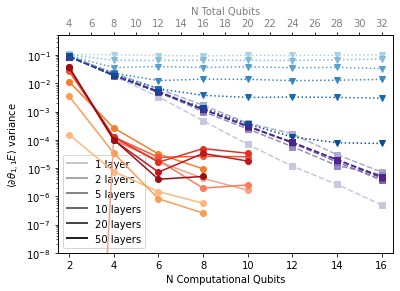

In [8]:
file_list = [data_folder + 'gradients/220412_global_circuit_16qubits_50layers_0.5lambda_1000samples-comb.dat',
             data_folder + 'gradients/220412_local_circuit_16qubits_50layers_0.5lambda_1000samples-comb.dat',
             data_folder + 'gradients/220411_gadget2_circuit_8qubits_50layers_0.5lambda_1000samples.dat',
             data_folder + 'gradients/220412_gadget3_circuit_10qubits_50layers_0.5lambda_1000samples-comb.dat']
# norm_file = data_folder + 'norms/gadget_6qubits_0.5lambda.dat'
# norm_dict = {'gadget': np.loadtxt(norm_file)[:,1]}
# %matplotlib widget
plot_variances_vs_qubits(file_list, colours, normalize=True, limits=[1e-8, 5e-1], lambda_value=0.5)

In [9]:
norm_file = data_folder + 'norms/gadget_6qubits_0.5lambda.dat'
norm_dict = {'gadget': np.loadtxt(norm_file)[:,1]}
print(norm_dict['gadget'])

[1.125 4.375 9.625]


Variance evolution on the script using the StronglyEntanglingLayers and the ExpvalCost  
<span style="color:red">/!\ Abandoned implementation </span>.

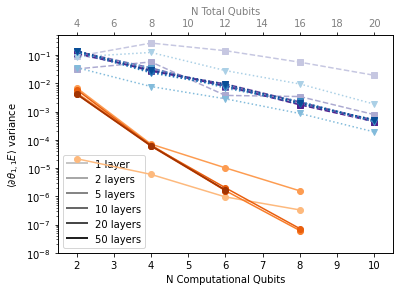

In [10]:
file_list = [data_folder + 'gradients/220413_global_10qubits_50layers_0.5lambda_200samples.dat',
             data_folder + 'gradients/220413_local_10qubits_50layers_0.5lambda_200samples.dat',
             data_folder + 'gradients/220413_gadget2_8qubits_50layers_0.5lambda_200samples.dat']

plot_variances_vs_qubits(file_list, colours, normalize=True, limits=[1e-8, 5e-1])

Variance evolution when using the HardwareEfficientAnsatz and the ExpvalCost

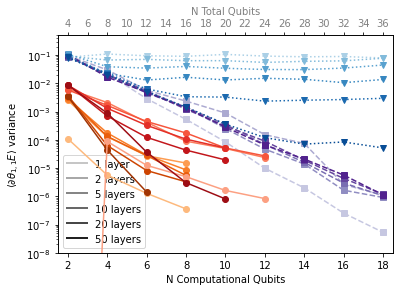

In [11]:
file_list = [data_folder + 'gradients/220414_global_18qubits_50layers_0.5lambda_200samples.dat',
             data_folder + 'gradients/220415_local_18qubits_50layers_0.5lambda_200samples.dat', 
             data_folder + 'gradients/220414_gadget2_8qubits_50layers_0.5lambda_200samples.dat', 
             data_folder + 'gradients/220419_gadget3_12qubits_50layers_0.5lambda_200samples.dat']

plot_variances_vs_qubits(file_list, colours, normalize=True, limits=[1e-8, 5e-1])

2/ Exploring the effect of λ and depth
-------------

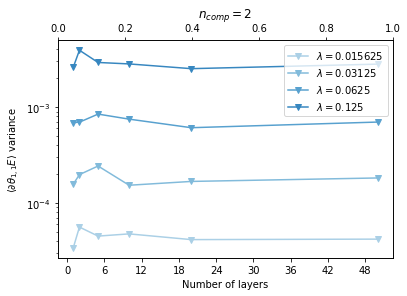

In [12]:
file = data_folder + 'gradients/220404_gadget_circuit_2qubits_50layers_200samples.dat'
plot_variances_vs_layers([file], [colours[1]])

Training
=======

2-local gadget decomposition
---------------------

4 qubits computational Hamiltonian and 2 layers deep Ansatz  
<span style="color:red">/!\ Forward light cone issue </span>.

In [27]:
subfolder = 'training/gadget2/'

# seed = 13
# file_list = [data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_500iterations_{:1.1f}lambda_seed{}.dat'.format(l, seed) for l in np.linspace(0, 1, 6)]
# plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])

# for seed in [14, 15]:
#     file_list = [data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_100iterations_{:1.1f}lambda_seed{}.dat'.format(l, seed) for l in np.linspace(0, 1, 6)]
#     plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])

# seed = 17
# file_list = [data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_500iterations_seed{}_{:1.1f}lambda.dat'.format(seed, l) for l in np.linspace(0, 1, 6)]
# plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])

# qubits = 4
# layers = 2
# for seed in [2, 3]:
#     file_list = [data_folder + subfolder + '220419_training_gadget2_{:02}qubits_{:02}layers_500iterations_seed{:02}_{:1.1f}lambda.dat'.format(qubits, layers, seed, l) for l in np.linspace(0, 1, 6)]
#     plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])

6 qubits computational Hamiltonian and 2 layers deep Ansatz  
<span style="color:red">/!\ Forward light cone issue </span>.

In [32]:
# qubits = 6
# layers = 2
# for seed in [13, 14, 15]:
#     file_list = [data_folder + subfolder + '220419_training_gadget2_{:02}qubits_{:02}layers_500iterations_seed{:02}_{:1.1f}lambda.dat'.format(qubits, layers, seed, l) for l in np.linspace(0, 1, 6)]
#     plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])

3-local gadget decomposition
--------------------------

4 qubits computational Hamiltonian and 2 layers deep Ansatz  
<span style="color:red">/!\ Forward light cone issue </span>.

In [31]:
# subfolder = 'training/gadget3/'
# qubits = 4
# layers = 2
# iterations = 1000
# for seed in [2, 3, 4, 5, 6]:
#     file_list = [data_folder + subfolder + '220419_training_gadget3_{:02}qubits_{:02}layers_{}iterations_seed{:02}_{:1.1f}lambda.dat'.format(qubits, layers, iterations, seed, l) for l in np.linspace(0, 1, 6)]
#     plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])